In [1]:
from utils import *

### Read image

481 x 321


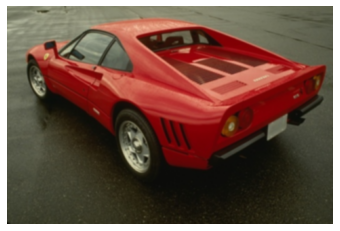

In [2]:
img = cv2.imread('car.jpg')

#OpenCV represents RGB images as multi-dimensional numpy array but in reverse order!
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rows, cols, channels = img.shape
print(cols, 'x', rows)

gauss = cv2.GaussianBlur(img,(5, 5), 1.0, borderType=cv2.BORDER_REPLICATE)
show_inplace(gauss)

### Gradient image
Gradient image is calculated based on the sobel operators for each channel. The gradient image for the $i$-th channel is:<br>
$G^{(i)} = \sqrt{{{S_x}^{(i)}}^2 + {{S_y}^{(i)}}^2}$ <br>
The results are then combined to give the final gradient image:
$G = \sqrt{\sum_{i}{{G^{(i)}}^2}}$

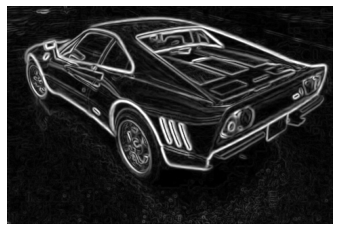

In [3]:
# Convert image from RGB to CIELAB (the lab colorspace is perceptually uniform for small differences)
Lab = rgb2lab(gauss)

L, a, b = cv2.split(Lab)

L = normalize(L)
a = normalize(a)
b = normalize(b)

L_sobelx = cv2.Sobel(L, cv2.CV_64F, 1, 0, ksize=3)
L_sobely = cv2.Sobel(L, cv2.CV_64F, 0, 1, ksize=3)

a_sobelx = cv2.Sobel(a, cv2.CV_64F, 1, 0, ksize=3)
a_sobely = cv2.Sobel(a, cv2.CV_64F, 0, 1, ksize=3)

b_sobelx = cv2.Sobel(b, cv2.CV_64F, 1, 0, ksize=3)
b_sobely = cv2.Sobel(b, cv2.CV_64F, 0, 1, ksize=3)

L_full = np.square(full_grad(L_sobelx, L_sobely))
a_full = np.square(full_grad(a_sobelx, a_sobely))
b_full = np.square(full_grad(b_sobelx, b_sobely))

gradient = (np.sqrt(L_full + a_full + b_full))
gradient = np.clip(255 * gradient, 0 ,255).astype(np.uint8)
show_inplace(gradient)

### MMGR image

Number of iterations till convergence:  16


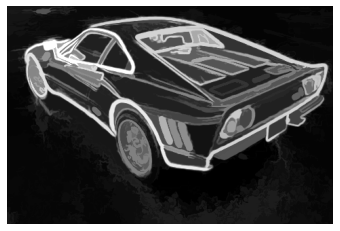

In [4]:
# Apply the MMGR operator to denoise the gradient image
morph_gradient = mmgr(gradient, min_radius=3)
show_inplace(morph_gradient)

### Watershed

Number of superpixels 96


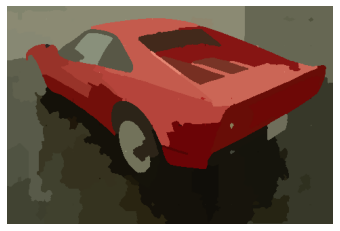

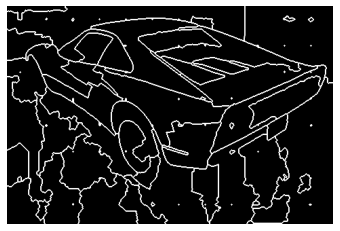

In [5]:
markers = watershed(morph_gradient, markers=100)

result = color_superpixels(markers, img)
print('Number of superpixels', len(np.unique(markers)))

show_inplace(result)
contours = mark_boundaries(np.zeros((rows, cols)), markers, color=[1,1,1])
show_inplace(contours)